In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

# Load and prepare data 

In [15]:
zri = pd.read_csv('../data/zri_multifamily_v2.csv')
zri['zip'] = zri['zip'].astype('string')
zri['zip'] = ["0"+z if len(z)<5 else z for z in zri['zip']]
zri['year'] = pd.to_datetime(zri['year-month'],format="%Y-%m").dt.year


acs = pd.read_csv('../../../zillow_orientation/acs_5yr_merged_v3.csv')
acs['zip'] = acs['zip'].astype('string')
acs['zip'] = ["0"+z if len(z)<5 else z for z in acs['zip']]
acs['year_used']= acs['year']+2

zri_acs = pd.merge(zri,acs,how='left',left_on=["zip","year"],right_on=["zip","year_used"])
zri_acs = zri_acs.drop(index=zri_acs[zri_acs['zip']=="11249"].index)

In [34]:
#zri.shape[0]==zri_acs.shape[0]

In [33]:
#len(zri_acs['zip'].unique())

In [32]:
#zri_acs.shape

In [29]:
#There are 72 rows where year_used (from ACS data) are NANs...
#meaning that zip is not in the ACS but is in the ZRI. Drop it. 

In [30]:
#zri_acs = zri_acs.drop(index=zri_acs[zri_acs['zip']=="11249"].index)

In [113]:
jc = zri_acs[(zri_acs['zip']=="07302") & (zri_acs['year_x']==2018)]
jc['bachelors_degree_2']

14304    12720.0
14305    12720.0
14306    12720.0
14307    12720.0
14308    12720.0
14309    12720.0
14310    12720.0
14311    12720.0
14312    12720.0
14313    12720.0
14314    12720.0
14315    12720.0
Name: bachelors_degree_2, dtype: float64

In [114]:
jc['total_pop']

14304    41026.0
14305    41026.0
14306    41026.0
14307    41026.0
14308    41026.0
14309    41026.0
14310    41026.0
14311    41026.0
14312    41026.0
14313    41026.0
14314    41026.0
14315    41026.0
Name: total_pop, dtype: float64

In [ ]:
jc['po']

In [115]:
jc['some_college_and_associates_degree']

14304    3551.0
14305    3551.0
14306    3551.0
14307    3551.0
14308    3551.0
14309    3551.0
14310    3551.0
14311    3551.0
14312    3551.0
14313    3551.0
14314    3551.0
14315    3551.0
Name: some_college_and_associates_degree, dtype: float64

In [184]:
zri_acs['derived_pop_over_25']= zri_acs[['male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_to_49',
 'male_50_to_54',
 'male_55_to_59',
 'male_60_61',
 'male_62_64',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over',
 'female_25_to_29',
 'female_30_to_34',
 'female_35_to_39',
 'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59',
 'female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over']].sum(axis='columns')

In [185]:
zri_acs['pop_25_64']

0        11112.0
1        11112.0
2        11112.0
3        11112.0
4        11112.0
          ...   
93739    32424.0
93740    32424.0
93741    32424.0
93742    32424.0
93743    32424.0
Name: pop_25_64, Length: 93672, dtype: float64

<AxesSubplot:>

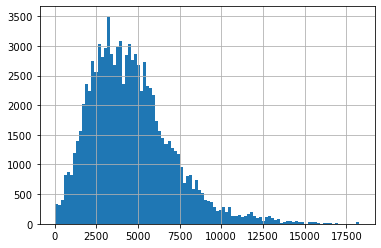

In [186]:
(zri_acs['derived_pop_over_25']-zri_acs['pop_25_64']).hist(bins=100)

<AxesSubplot:>

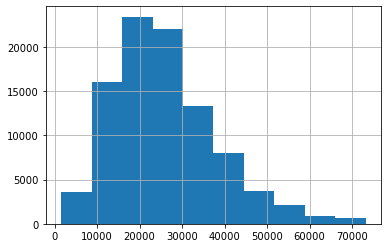

In [187]:
zri_acs['derived_pop_over_25'].hist()

<AxesSubplot:>

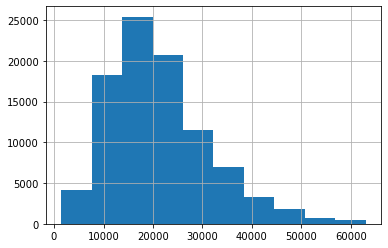

In [188]:
zri_acs['pop_25_64'].hist()

In [189]:
zri_acs['derived_pop_over_25'].min()

1596.0

# Education

In [190]:
_percent_graduate = zri_acs['graduate_professional_degree']/zri_acs['total_pop'] #population 
_percent_bachelors = zri_acs['bachelors_degree_2']/zri_acs['total_pop'] #population 
_percent_associates = zri_acs['some_college_and_associates_degree']/zri_acs['derived_pop_over_25'] #25 and over 
_percent_highschool = zri_acs['high_school_including_ged']/zri_acs['derived_pop_over_25']  #25 and over 
_percent_less_highschool = zri_acs['less_than_high_school_graduate']/zri_acs['derived_pop_over_25']  #25 and over 


# Commute 

In [206]:
_percent_commute_public_transport = zri_acs['commuters_by_public_transportation']/zri_acs['commuters_16_over'] 

In [216]:
_percent_commute_less_30 = (zri_acs[['commute_5_9_mins',
                                   'commute_10_14_mins',
                                   'commute_15_19_mins',
                                   'commute_20_24_mins',
                                   'commute_25_29_mins']].sum(axis='columns'))/zri_acs['commuters_16_over']

_percent_commute_30_to_59 = (zri_acs[['commute_30_34_mins',
                                     'commute_35_44_mins',
                                     'commute_35_39_mins',
                                     'commute_40_44_mins',
                                     'commute_45_59_mins']].sum(axis='columns'))/zri_acs['commuters_16_over']

_percent_commute_60_to_89 = zri_acs['commute_60_89_mins']/zri_acs['commuters_16_over']

_percent_commute_90_more = zri_acs['commute_90_more_mins']/zri_acs['commuters_16_over']

# Movers

In [217]:
#moved to this city from another city 
_percent_new_city = zri_acs['different_house_year_ago_different_city']/zri_acs['total_pop']

In [ ]:
#moved to a new unit in this same city
_percent_new_unit = zri_acs['different_house_year_ago_same_city']/zri_acs['total_pop']

# Renter occupied 

In [220]:
#Renter occupied housing units. All occupied units which are not owner occupied, whether they 
#are rented for cash rent or occupied without payment of cash rent, are classified as renter-occupied.
_percent_renter_occupied = zri_acs['housing_units_renter_occupied']/zri_acs['housing_units']

In [222]:
_percent_owner_occupied = zri_acs['owner_occupied_housing_units']/zri_acs['housing_units']

In [ ]:
_percent_for_rent = zri_acs['vacant_housing_units_for_rent']/zri_acs['housing_units']

In [ ]:
_median_age = zri_acs['median_age']

In [ ]:
pre_working_cols = [
    'male_under_5',
    'male_5_to_9',
    'male_10_to_14',
    'male_15_to_17',
    'female_under_5',
    'female_5_to_9',
    'female_10_to_14',
    'female_15_to_17'
]
adult_cols = [
    'male_18_to_19',
    'male_20',
    'male_21',
    'male_22_to_24',
    'male_25_to_29',
    'male_30_to_34',
    'male_35_to_39',
    'female_18_to_19',
    'female_20',
    'female_21',
    'female_22_to_24',
    'female_25_to_29',
    'female_30_to_34',
    'female_35_to_39'
]
older_adult_cols = [
    'female_40_to_44',
    'female_45_to_49',
    'female_50_to_54',
    'female_55_to_59',
    'female_60_to_61',
    'female_62_to_64',
    'male_40_to_44',
    'male_45_to_49',
    'male_50_to_54',
    'male_55_to_59',
    'male_60_61',
    'male_62_64'
]
senior_cols = [
    'female_65_to_66',
    'female_67_to_69',
    'female_70_to_74',
    'female_75_to_79',
    'female_80_to_84',
    'female_85_and_over',
    'male_65_to_66',
    'male_67_to_69',
    'male_70_to_74',
    'male_75_to_79',
    'male_80_to_84',
    'male_85_and_over'
]
df['white_pct'] = df['white_pop']/df['total_pop']
df['black_pct'] = df['black_pop']/df['total_pop']
df['asian_pct'] = df['asian_pop']/df['total_pop']
df['hispanic_pct'] = df['hispanic_pop']/df['total_pop']
df['hispanic_pct'] = df['hispanic_pop']/df['total_pop']
df['native_pct'] = df['amerindian_pop']/df['total_pop']
df['other_pct'] = df['other_race_pop']/df['total_pop']
df['pre_working_pct'] = df.loc[:,pre_working_cols].sum(axis = 1)/df['total_pop']
df['18_39_pct'] = df.loc[:,adult_cols].sum(axis = 1)/df['total_pop']
df['40_64_pct'] = df.loc[:,older_adult_cols].sum(axis = 1)/df['total_pop']
df['65+_pct'] = df.loc[:,senior_cols].sum(axis = 1)/df['total_pop']
# trying to measure demand of rental units
df['rental_unit_vacancy_ratio'] = df['vacant_housing_units_for_rent']/df['housing_units_renter_occupied']

In [ ]:
#dwellings 50 and more
#year built  

In [ ]:
# percent_commute_
# 'commute_5_9_mins',
# 'commute_10_14_mins',
#  'commute_15_19_mins',
#  'commute_20_24_mins',
#  'commute_25_29_mins',
#  'commute_30_34_mins',
# 'commute_35_44_mins',
#  'commute_35_39_mins',
# 'commute_40_44_mins',
#  'commute_45_59_mins',
#  'commute_60_89_mins',
#  'commute_90_more_mins',
#  'commute_60_more_mins',
#  'commute_less_10_mins',
#  'commuters_16_over',